In [2]:
%pip install pillow
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\victor\mds21\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


     --------------------------------------- 38.6/38.6 MB 10.2 MB/s eta 0:00:00
     --------------------------------------- 15.8/15.8 MB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\victor\mds21\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [29]:
%pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install matplotlib

     ---------------------------------------- 7.7/7.7 MB 11.4 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 KB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 KB 2.9 MB/s eta 0:00:00
     ------------------------------------- 187.5/187.5 KB 11.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 11.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\victor\mds21\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [26]:
%pip install pandas

     --------------------------------------- 11.6/11.6 MB 22.6 MB/s eta 0:00:00
     ------------------------------------- 505.5/505.5 KB 33.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\victor\mds21\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import cv2
from PIL import Image
import pytesseract
from matplotlib import pyplot as plt
import numpy as np
from pathlib import Path
import pandas as pd
import re
import os

In [5]:
#using pillow to open image
file = "data/150.png"
im = Image.open(file)
im.show()

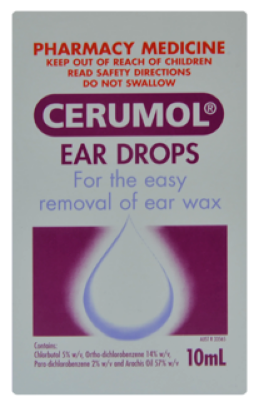

In [11]:
#using opencv to open image
img = cv2.imread(file)

In [2]:
def display(im_path):

    dpi = 80
    im_data = plt.imread(im_path)
    if len(im_data.shape) == 3:
        height, width, depth = im_data.shape
    else:
        height, width = im_data.shape

    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

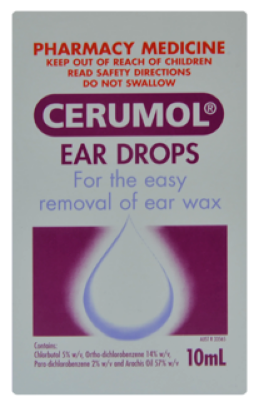

In [12]:
#display image inline
display(file)

## Invert Images

In [22]:
#invert image
def invert(img):
  inverted_image = cv2.bitwise_not(img)
  return inverted_image
  
cv2.imwrite("temp/inverted.png", invert(img))

True

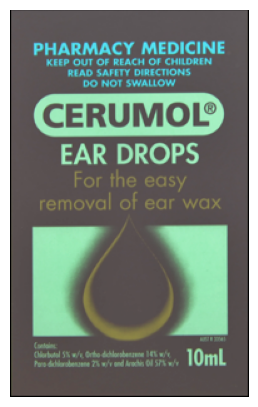

In [23]:
display("temp/inverted.png")

## Binarization

In [5]:
def grayscale(img):
  return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# cv2.imwrite("temp/binarized.png", grayscale(img))

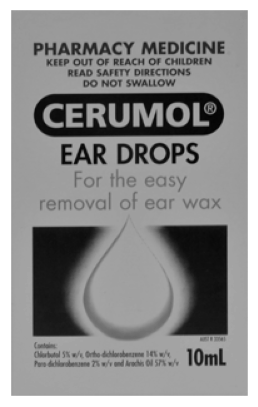

In [36]:
display("temp/binarized.png")

In [6]:
# gray_image = grayscale(img)
def binarize(img):
  thresh, im_bw = cv2.threshold(img, 200, 230, cv2.THRESH_BINARY)
  return im_bw

# im_bw = binarize(gray_image)
# cv2.imwrite("temp/bw_image.png", im_bw)

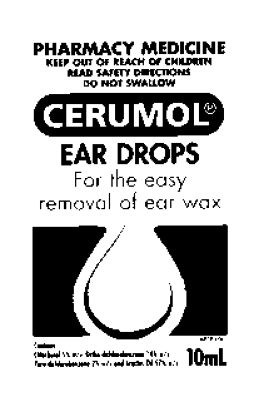

In [48]:
display("temp/bw_image.png")

In [64]:
def rescale_up(img):
  if img.shape[0] < 500 or img.shape[1] < 500:
    img_scaled_up = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)
  return img_scaled_up

rescaled_img = rescale_up(img)
print(img.shape)
print(rescaled_img.shape)
cv2.imwrite("temp/rescaled.png", rescaled_img)

(310, 191, 3)
(620, 382, 3)


True

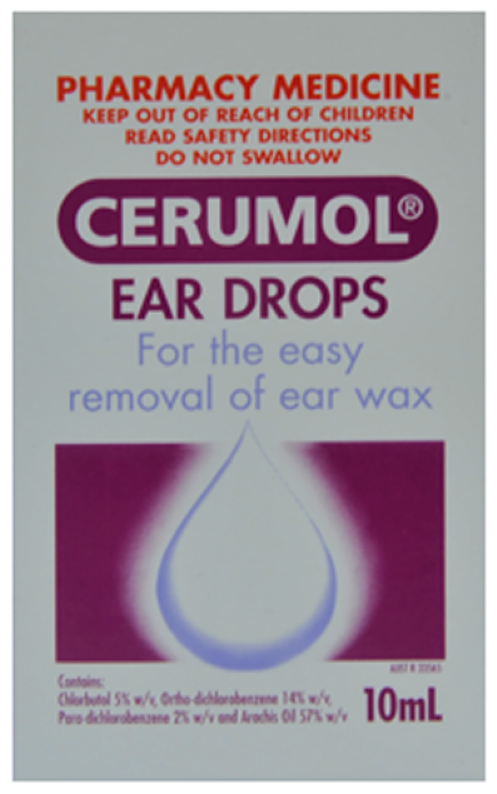

In [63]:
display("temp/rescaled.png")

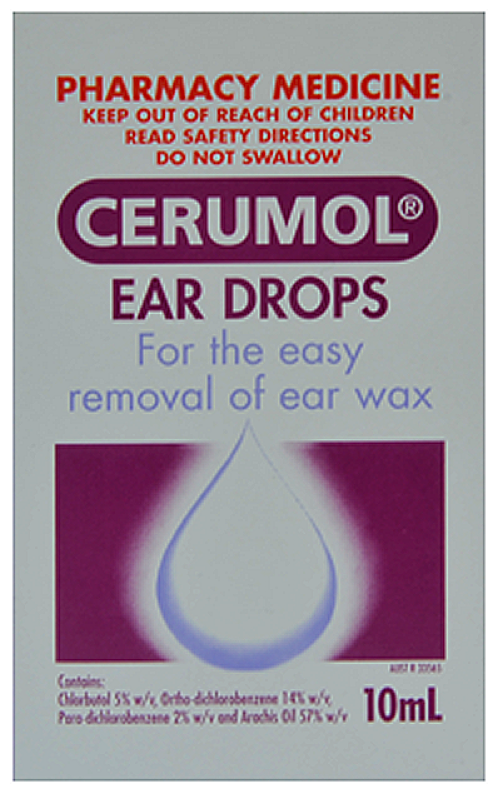

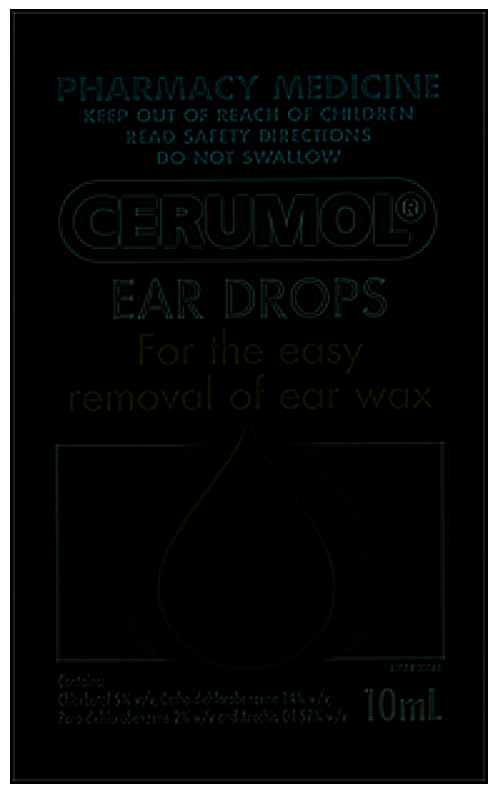

In [68]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
sharpened_image = cv2.filter2D(rescaled_img, -1, kernel)
sharpened_image2 = cv2.Laplacian(rescaled_img, cv2.CV_64F)
cv2.imwrite("temp/sharpened.png", sharpened_image)
cv2.imwrite("temp/sharpened2.png", sharpened_image2)

display("temp/sharpened.png")
display("temp/sharpened2.png")



In [7]:
def preprocess(img):
  # rescaled = rescale_up(img)
  kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) 
  sharpened_image = cv2.filter2D(img, -1, kernel)
  gray_scaled = grayscale(sharpened_image)
  binarized = binarize(gray_scaled)

  return binarized

# prep_img = preprocess(img)
# cv2.imwrite("temp/preprocess.png", prep_img)
# display("temp/preprocess.png")

In [ ]:

conda create -n dbnet python=3.6
conda install ipython pip
pip install -r requirement.txt
conda install pytorch torchvision cudatoolkit=10.1 -c pytorch

In [ ]:
import torch 
import torch.nn as nn


In [4]:
# function to batch process images
def batch_return_img(number):
  return str(number) + ".png"

# function for pytesseract
def ocr(file_path):
  img = Image.open(file_path)
  ocr_result = pytesseract.image_to_string(img)
  return ocr_result



In [20]:
# full function for model
def mds21():

  # read dataset
  df = pd.read_csv("../Dataset/0 med_data_latest.csv")
  api_list = ['abacavir', 'acamprosate', 'acarbose', 'acetazolamide', 'acetic acid-glacial', 'aciclovir', 'activated charcoal', 'adalimumab', 'adapalene', 'adrenaline', 'agomelatine', 'alafenamide', 'alendronate', 'alendronate sodium', 'allopurinol', 'alprazolam', 'alprostadil', 'alteplase', 'aluminium hydroxide', 'amantadine', 'amiloride', 'amiodarone', 'amiodarone ', 'amisulpride', 'amitriptyline', 'amlodipine', 'ammonium bicarbonate', 'amorolfine', 'amoxycillin', 'amphotericin', 'amylmetacresol', 'amylmetacresol ', 'anastrozole', 'antazoline phosphate', 'apixaban', 'apixaban ', 'apomorphine  hemihydrate', 'apraclonidine', 'arachis oil', 'aripiprazole', 'aspart  protamine', 'aspirin', 'atenolol', 'atorvastatin', 'atovaquone', 'atropine', 'atropine sulfate', 'azathioprine', 'azelastine ', 'azithromycin', 'baclofen', 'beclomethasone', 'beclomethasone dipropionate', 'benserazide', 'benzalkonium chloride', 'benzhexol', 'benzocaine', 'benzoic acid', 'benzoncaine', 'benzoyl peroxide', 'benzydamine', 'benzydamine ', 'benzyl alcohol', 'benzyl benzoate', 'benzylpenicillin', 'betahistine', 'betamethasone dipropionate', 'betamethasone valerate', 'bethanechol', 'bictegravir', 'bifonazole', 'bimatoprost', 'biperiden', 'bisacodyl', 'bisoprolol fumarate', 'brimonidine', 'bromazepam', 'bromhexine', 'bromhexine ', 'bromocriptine', 'budesonide', 'buprenorphine', 'bupropion', 'butylated hydroxyanisole', 'cabergoline', 'caffeine', 'calcitriol', 'calcium', 'calcium carbonate', 'calcium chloride', 'camphor', 'candesartan', 'candesartanl', 'capecitabine', 'carbamazepine', 'carbamide peroxide', 'carbidopa', 'carbimazole', 'carbomer', 'carbomer 580', 'carbomer 980', 'carmellose', 'carmellose sodium', 'cefaclor', 'cefepime ', 'ceftazidime', 'ceftriaxone', 'cefuroxime', 'celecoxib', 'cephalexin', 'cetalkonium chloride', 'cetirizine', 'cetrimide', 'cetylpyridium chloride', 'chloramphenicol', 'chlorbutol', 'chlorhexidine', 'chlorhexidine gluconate', 'chlorpromazine', 'chlorpromazine ', 'cholestyramine', 'choline salicylate', 'ciclesonide', 'ciclosporin', 'cinacalcet', 'cinchocaine', 'ciprofloxacin', 'citalopram', 'citric acid anhydrous', 'clarithromycin', 'clavulanic acid', 'clindamycin', 'clioquinol', 'clobazam', 'clobetasone butyrate', 'clomiphene', 'clomipramine', 'clonazepam', 'clonidine', 'clonidine ', 'clopidogrel', 'clotrimazole', 'clove bud oil', 'coal tar', 'cobicistat', 'colchicine', 'colecalciferol', 'crotamiton', 'cyclizine', 'cyclizine lactate', 'cyclosporin', 'cyproheptadine', 'cyproterone', 'dabigatran', 'danaparoid sodium', 'desloratadine', 'desmopressin', 'desogestrel', 'desvenlafaxine', 'dexamethasone', 'dexamphetamine sulphate:dexamphetamine', 'dexchlorpheniramine maleate', 'dexpanthenol', 'dextran', 'dextran 70', 'dextromethorphan hydrobromide', 'dextropropoxyphene', 'diazepam', 'dichlorobenzyl alcohol', 'dichlorobenzyl alcohol ', 'diclofenac', 'diclofenac potassium', 'diclofenac sodium', 'dicloxacillin', 'digoxin', 'dihydroergotamine', 'diltiazem', 'diphenoxylate', 'dipyridamole', 'disodium etidronate', 'disopyramide', 'docusate sodium', 'dolutegravir', 'domperidone', 'donepezil', 'dorzolamide', 'dothiepin', 'dothiepin hcl', 'doxepin', 'doxycycline', 'doxylamine succinate', 'dulaglutide', 'dydrogesterone', 'econazole', 'econazole nitrate', 'efavirenz', 'eformoterol', 'eformoterol = formoterol', 'elvitegravir', 'emtricitabine', 'enalapril', 'enoxaparin', 'enoxaparin sodium', 'entacapone', 'eplerenone', 'eprosartan', 'eprosartan:mesylate', 'erythromycin', 'erythromycin ethylsuccinate', 'escitalopram', 'esomeprazole', 'estradiol', 'etanercept', 'ethanol', 'ethinyloestradiol', 'ethinyloestriol', 'etonogestrel', 'eucalyptus oil', 'exenatide', 'ezetimibe', 'famciclovir', 'famiciclovir', 'famotidine', 'felodipine', 'fenofibrate', 'fentanyl', 'ferrous fumarate', 'ferrous sulfate', 'ferrous sulphate', 'fexofenadine', 'finasteride', 'flecainide acetate', 'flucloxacillin', 'fluconazole', 'fludrocortisone', 'flumethasone', 'flunitrazepam', 'fluorometholone', 'fluorometholone acetate', 'fluorouracil ', 'fluoxetine', 'fluticasone', 'fluticasone furoate', 'fluticasone propionate', 'fluvastatin', 'fluvoxamine', 'folic acid', 'fosinopril', 'framycetin', 'frusemide', 'frusemide = furosemide', 'fusidic acid', 'gabapentin', 'galantamine', 'gemfibrozil', 'gestodene', 'glibenclamide', 'gliclazide', 'glimepiride', 'glipizide', 'glycerin', 'glycerol', 'glyceryl trin', 'glyceryl trinitrate', 'glycopyrronium ', 'goserelin', 'gramicidin', 'guaiphenesin', 'haloperidol', 'homatropine', 'hydralazine', 'hydrochlorothiazide', 'hydrocortisone', 'hydromorphone', 'hydroxocobalamin', 'hydroxychloroquine', 'hyoscine butylbromide', 'hyoscine hydrobromide', 'hyoscyamine sulfate', 'hypromellose', 'ibuprofen', 'idoxuridine', 'imipramine', 'imiquimod', 'indapamide', 'indometacin', 'indomethacin = indometacin', 'insulin aspart', 'insulin detemir', 'insulin glargine', 'insulin glarine', 'insulin isophane', 'insulin lispro', 'insulin neutral', 'ipratroium bromide', 'ipratropium', 'irbesartan', 'iron polymaltose', 'iron, vitamin c', 'isophane insulin', 'isopropyl alcohol', 'isosorbide dinit', 'isosorbide mononitrate', 'isotretinoin', 'ivermectin', 'ketoconazole', 'ketoprofen', 'ketorolac trometamol', 'ketotifen', 'labetalol', 'lactic acid', 'lactulose', 'lamivudine', 'lamotrigine', 'lansoprazole', 'latanoprost', 'leflunomide', 'lercanid', 'lercanidipine', 'letrozole', 'levetiracetam', 'levocabastine', 'levodopa', 'levonorgesterol', 'levonorgestrel', 'levothyroxine', 'lignocaine', 'lincomycin', 'lisinopril', 'lispro protamine', 'lithium', 'lithium carbonate', 'loperamide', 'loratadine', 'lorazepam', 'magnesium alginate', 'magnesium carbonate', 'magnesium hydroxide', 'magnesium tricilicate', 'maldison', 'mebendazole', 'medroxyprogesterone', 'medroxyprogesterone acetate', 'mefenamic acid', 'mefloquine', 'melatonin', 'meloxicam', 'memantine', 'menthol', 'menthol ', 'mercaptopurine', 'mesalazine', 'mestranol', 'metformin', 'metformin xr', 'methadone', 'methotrexate', 'methylphenidate', 'methylprednisolone', 'metoclopramide', 'metoprolol succinate', 'metoprolol tartrate', 'metronidazole', 'mianserin', 'miconazole', 'miconazole nitrate', 'minocycline', 'mirtazapine', 'moclobemide', 'mometasone furoate', 'montelukast', 'morphine', 'morphine sulfate', 'morphine sulphate', 'moxonidine', 'mupirocin', 'mupirocin ', 'naltrexone', 'nan', 'naphazoline ', 'naphazoline hcl', 'naproxen', 'naproxen sodium', 'naratriptan', 'nedocromil', 'neomycin', 'neutral insulin', 'nicorandil', 'nicotine', 'nifedipine', 'nitrazepam', 'nitrofurantoin', 'nizatidine', 'norethisterone', 'norfloxacin', 'nortriptyline', 'nystatin', 'oestradiol', 'oestriol ', 'oestrogens conjugated', 'ofloxacin', 'olanzapine', 'olmesartan', 'olopatadine', 'olsalazine sodium', 'omeprazole', 'ondansetron', 'orphenadrine citrate', 'ortho-dichlorobenzene', 'oseltamivir', 'oxazepam', 'oxpentifylline', 'oxybutynin', 'oxycodone', 'oxycodone ', 'oxymetazoline ', 'pantoprazole', 'para-dichlorobenzene', 'paracetamol', 'paroxetine', 'pergolide mesylate', 'perhexiline maleate', 'pericyazine', 'permethrin', 'peru balsam', 'pethidine', 'phenazone', 'pheniramine maleate', 'phenobarbitone', 'phenol', 'phenoxymethylpenicillin', 'phentermine', 'phenylephine', 'phenylephrine', 'phenylephrine ', 'phenytoin sodium', 'pilocarpine ', 'pimecrolimus', 'pindolol', 'pioglitazone', 'piroxicam', 'pizotifen', 'podophyllum resin', 'poloxamer', 'polyethylene glycol', 'polysorbate 80', 'polyvinyl alcohol', 'potassium bicarbonate', 'potassium chlor', 'potassium chloride', 'potassium clavulanic', 'potassium dihydrogen phosphate', 'povidone', 'pramipexole', 'prasugrel', 'pravastatin', 'prazosin', 'prednisolone', 'prednisolone sodium phosphate', 'prednisone', 'pregabalin', 'primidone', 'probenecid', 'procaine penicill', 'prochlorperazine', 'prochlorperazine maleate', 'prochlorperazine mesylate', 'proguanil', 'propantheline', 'propranolol', 'propylene glycol', 'pseudoephedrine', 'pseudoephedrine sulfate', 'pyrantel', 'quetiapine', 'quetiapine fumarate', 'quinapril', 'quinine bisulphate', 'quinine sulphate', 'rabeprazole', 'raloxifene', 'ramipril', 'reboxetine', 'rilpivirine', 'risedronate', 'risperidone', 'rivaroxaban', 'rivastigmine', 'rizatriptan', 'rosiglitazone', 'rosuvastatin', 'roxithromycin', 'salbutamol', 'salicylic acid', 'salmeterol', 'selegiline', 'sennosides', 'sertraline', 'sevelamer', 'sildenafil', 'silver sulfadiazine', 'simethicone', 'simvastatin', 'sitagliptin', 'sodium alginate', 'sodium bicarbonate', 'sodium carbonate', 'sodium chloride', 'sodium citrate', 'sodium cromoglycate', 'sodium fusidate', 'sodium lauryl sulfoacetate', 'sodium sulfite', 'sodium valproate', 'solifenacin', 'sorbitol', 'sotalol', 'sotalol ', 'spironolactone', 'sucralfate', 'sulfamethoxazole', 'sulfasalazine', 'sulindac', 'sumatripan', 'sumatriptan', 'tacrolimus', 'tamoxifen', 'tamoxifen citrate', 'tamsulosin', 'tar', 'telmisartan', 'temazepam', 'tenofovir', 'tenofovir alafenamide', 'terbinafine', 'terbinafine ', 'testosterone', 'testosterone undecanoate', 'tetrahydrozoline', 'tetrahydrozoline ', 'theophylline', 'thyroxine', 'tiaprofenic acid', 'tibolone', 'tilactase', 'timolol', 'timolol ', 'tinidazole', 'tiotropium', 'tobramycin', 'tobramycin ', 'topiramate', 'tramadol', 'tramazoline ', 'trandolapril', 'tranylcypromine', 'travoprost', 'tretinoin', 'triamcinolone', 'triamcinolone acetonide', 'triclosan', 'triethanolamine lauryl sulfate', 'trifluoperazine', 'trimeprazine', 'trimethoprim', 'ulipristal acetate', 'ursodeoxycholic', 'valaciclovir', 'valsartan', 'vardenafil', 'varenicline', 'venlafaxine', 'verapamil', 'vildagliptin', 'vortioxetine', 'warfarin sodium', 'xylometazoline', 'xylometazoline ', 'zinc oxide', 'ziprasidone', 'zolmitriptan', 'zolpidem', 'zopiclone']

  # store total success and failure for model
  true = 0
  false = 0

  for i in range(2, 36): # modify back to 1525

    # batch process images
    img_number = batch_return_img(i)

    # file_paths
    # ori_file_path = "../Dataset/" + img_number + ".png"
    file_path = "../Image Pre-Processing/enhanced_images2/"+ str(img_number) 
    print(file_path)

    if Path(file_path).is_file():

      # read file
      # ori_img = cv2.imread(temp_file_path)

      # preprocess image
      # preprocessed_img = preprocess(ori_img)
      # cv2.imwrite(temp_file_path, preprocessed_img)

      # ocr image then remove temp file from system to prevent clogging
      ocr_results = ocr(file_path)
      # os.remove(file_path)

      # post process ocr results
      ocr_results_list = ocr_results.split("\n\n")
      print(ocr_results_list)
      clean_ocr_results_list = []
      final_list = ["",""]

      for sentence in ocr_results_list:

        if "contains" in sentence:    # if the word "contains" is in the sentence
          clean_ocr_results_list.append(sentence.replace("\n", " "))

        pattern = r'\d+\s?(?:mg|mcg|%w/w)'

        if bool(re.search(pattern, sentence)):    # if the word has number followed by unit
          clean_ocr_results_list.append(sentence.replace("\n", " "))

      for item in ocr_results_list:
        match = re.search(pattern, item)
        print(match)
        if match:
          final_list[1] = match.group()
    
        for api in api_list:
          if api in item.lower():
            final_list[0] = api
      
      print(final_list)
      
      row = df.loc[df['id'] == i]
      print(row)

      # match api and dosage
      if row['api'].values[0] == final_list[0] and row['dosage'].values[0] == final_list[1]:
        true += 1
      
      else:
        false += 1
    
    else:
      print(img_number + " does not exist")
      continue
    
  accuracy = (true / (true + false)) * 100

  print("The accuracy is: " + str(accuracy) + "%")

mds21()

../Image Pre-Processing/enhanced_images2/2.png
['om Woes\nit', 'Senokot\n> tablets\noy', 'effective\nconstipation', '']
None
None
None
None
['', '']
   id brand_name         api dosage    type pack_size brand
0   2    senokot  sennosides  7.5mg  tablet         1   NaN
../Image Pre-Processing/enhanced_images2/3.png
['']
None
['', '']
   id brand_name         api dosage    type pack_size brand
1   3   prunelax  sennosides   15mg  tablet         1   NaN
../Image Pre-Processing/enhanced_images2/4.png
['Dulcelax', '50 TABLETS.\nCONSTIPATION RELIEF', 'For predictable\nrelief of constipation', '']
None
None
None
None
['', '']
   id brand_name        api dosage    type pack_size brand
2   4   dulcolax  bisacodyl    5mg  tablet         1   NaN
../Image Pre-Processing/enhanced_images2/5.png
['PHARMACIST ONLY MEDICINE', 'KEEP OUT OF REACH OF CHLDRE', 'FANG for Cold Sores):', 'famciclovir 500 mg:\nG@)rblets [coe =s aes @aespen', '']
None
None
None
<re.Match object; span=(12, 18), match='500 mg'>
N

In [34]:
df = pd.read_csv("../Dataset/0 med_data_latest.csv")
print(df.loc[df['id'] == 1493])
print(df.sample(n=10))

        id brand_name         api dosage    type pack_size brand
1295  1493    levitra  vardenafil   20mg  tablet         4  (bn)
        id           brand_name                               api     dosage  \
69      97      cold sore cream                         aciclovir      5%w/w   
235    336  fosamax once weekly                alendronate sodium       70mg   
828    991           ritalin la                   methylphenidate       30mg   
929   1099            norimin-1  norethisterone$ethinyloestradiol  1mg$35mcg   
729    877           roaccutane                      isotretinoin       10mg   
817    980      diaformin xr 1g                      metformin xr         1g   
125    168        zaditen 2.5ml                         ketotifen  250mcg/ml   
1039  1217          sandomigran                         pizotifen      0.5mg   
282    383              maxamox                       amoxycillin  500mg/5ml   
515    640            renitec m                         enalapril     

In [22]:
print(Path("../Dataset/9.png").is_file())
# img = cv2.imread("../Dataset/9.png")
# preprocess(img)
# display("../Dataset/9.png")

False


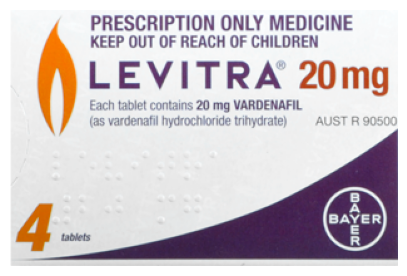

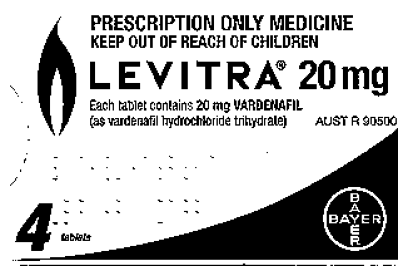

PRESCRIPTION ONLY MEDICINE
KEEP OUT OF REACH OF CHILDREN

FR LEVITRA 20mg

Each tablet contains 20 ag VARDENAFIL
(Gs vardenafil iydrocioie tiiydiale) AUST R 90500


['prescription only medicine\nkeep out of reach of children', 'fr levitra 20mg', 'each tablet contains 20 ag vardenafil\n(gs vardenafil iydrocioie tiiydiale) aust r 90500', '']
<re.Match object; span=(11, 15), match='20mg'>
<re.Match object; span=(11, 15), match='20mg'>
None
<re.Match object; span=(11, 15), match='20mg'>
None
['fr levitra 20mg', 'each tablet contains 20 ag vardenafil (gs vardenafil iydrocioie tiiydiale) aust r 90500']
['vardenafil', '20mg']
True result: vardenafil 20mg


In [45]:
img = cv2.imread("../Dataset/1493.png")
display("../Dataset/1493.png")

api_list = ["vardenafil"]

preprocessed_img = preprocess(img)
cv2.imwrite("temp/test.png", preprocessed_img)
display("temp/test.png")

pil_img = Image.open("temp/test.png")
ocr_result = pytesseract.image_to_string(pil_img)
print(ocr_result)

split_list = ocr_result.lower().split("\n\n")
print(split_list)

clean_ocr_results_list = []
final_list = ["",""]

for sentence in split_list:
  if "contains" in sentence or "per" in sentence:
    clean_ocr_results_list.append(sentence.replace("\n", " "))

  pattern = r'\d+\s?(?:mg|mcg|%w/w)'
  
  if bool(re.search(pattern, sentence)):    # if the word has number followed by unit
    clean_ocr_results_list.append(sentence.replace("\n", " "))

  for item in clean_ocr_results_list:
    match = re.search(pattern, item)
    print(match)
    if match:
      final_list[1] = match.group()
    
    for api in api_list:
      if api in item:
        final_list[0] = api

print(clean_ocr_results_list)
print(final_list)

row = df.loc[df['id'] == 1493]

if row['api'].values[0] == final_list[0] and row['dosage'].values[0] == final_list[1]:
  print("True result: " + final_list[0] + " " + final_list[1])




In [23]:
# function to pull apis from the csv file
import pandas as pd
import numpy as np

df = pd.read_csv("D:\\2024\\FYP\\codebase\\Medication-Dispensing-with-Image-Processing\\Medication-Dispensing-with-Image-Processing\Dataset\\0 med_data_latest.csv")
df['api'] = df['api'].astype(str).fillna('ZZZZZ yo check this out, its empty')
bruh = df['api'].str.split('$').sum()
unique_values_set = set(bruh)
unique_values = list(unique_values_set)
unique_values.sort()
unique_df = pd.DataFrame(unique_values, columns=['API'])
unique_df.to_csv('unique_apis.csv', index=False)


#testing
print("Unique values list:", unique_values)

Unique values list: [' dichlorobenzyl alcohol ', 'Methyl', 'Propyl ', 'abacavir', 'acamprosate', 'acarbose', 'acetazolamide', 'acetic acid-glacial', 'aciclovir', 'activated charcoal', 'adalimumab', 'adapalene', 'adrenaline', 'agomelatine', 'alafenamide', 'alendronate', 'alendronate sodium', 'allopurinol', 'alprazolam', 'alprostadil', 'alteplase', 'aluminium hydroxide', 'amantadine', 'amiloride', 'amiodarone', 'amiodarone ', 'amisulpride', 'amitriptyline', 'amlodipine', 'ammonium bicarbonate', 'amorolfine', 'amoxycillin', 'amphotericin', 'amylmetacresol', 'amylmetacresol ', 'anastrozole', 'antazoline phosphate', 'apixaban', 'apixaban ', 'apomorphine  hemihydrate', 'apraclonidine', 'arachis oil', 'aripiprazole', 'aspart  protamine', 'aspirin', 'atenolol', 'atorvastatin', 'atovaquone', 'atropine', 'atropine sulfate', 'azathioprine', 'azelastine ', 'azithromycin', 'baclofen', 'beclomethasone', 'beclomethasone dipropionate', 'benserazide', 'benzalkonium chloride', 'benzhexol', 'benzocaine',

In [ ]:
img = cv2.imread("../Dataset/1493.png")
display("../Dataset/1493.png")

api_list = ['abacavir', 'acamprosate', 'acarbose', 'acetazolamide', 'acetic acid-glacial', 'aciclovir', 'activated charcoal', 'adalimumab', 'adapalene', 'adrenaline', 'agomelatine', 'alafenamide', 'alendronate', 'alendronate sodium', 'allopurinol', 'alprazolam', 'alprostadil', 'alteplase', 'aluminium hydroxide', 'amantadine', 'amiloride', 'amiodarone', 'amiodarone ', 'amisulpride', 'amitriptyline', 'amlodipine', 'ammonium bicarbonate', 'amorolfine', 'amoxycillin', 'amphotericin', 'amylmetacresol', 'amylmetacresol ', 'anastrozole', 'antazoline phosphate', 'apixaban', 'apixaban ', 'apomorphine  hemihydrate', 'apraclonidine', 'arachis oil', 'aripiprazole', 'aspart  protamine', 'aspirin', 'atenolol', 'atorvastatin', 'atovaquone', 'atropine', 'atropine sulfate', 'azathioprine', 'azelastine ', 'azithromycin', 'baclofen', 'beclomethasone', 'beclomethasone dipropionate', 'benserazide', 'benzalkonium chloride', 'benzhexol', 'benzocaine', 'benzoic acid', 'benzoncaine', 'benzoyl peroxide', 'benzydamine', 'benzydamine ', 'benzyl alcohol', 'benzyl benzoate', 'benzylpenicillin', 'betahistine', 'betamethasone dipropionate', 'betamethasone valerate', 'bethanechol', 'bictegravir', 'bifonazole', 'bimatoprost', 'biperiden', 'bisacodyl', 'bisoprolol fumarate', 'brimonidine', 'bromazepam', 'bromhexine', 'bromhexine ', 'bromocriptine', 'budesonide', 'buprenorphine', 'bupropion', 'butylated hydroxyanisole', 'cabergoline', 'caffeine', 'calcitriol', 'calcium', 'calcium carbonate', 'calcium chloride', 'camphor', 'candesartan', 'candesartanl', 'capecitabine', 'carbamazepine', 'carbamide peroxide', 'carbidopa', 'carbimazole', 'carbomer', 'carbomer 580', 'carbomer 980', 'carmellose', 'carmellose sodium', 'cefaclor', 'cefepime ', 'ceftazidime', 'ceftriaxone', 'cefuroxime', 'celecoxib', 'cephalexin', 'cetalkonium chloride', 'cetirizine', 'cetrimide', 'cetylpyridium chloride', 'chloramphenicol', 'chlorbutol', 'chlorhexidine', 'chlorhexidine gluconate', 'chlorpromazine', 'chlorpromazine ', 'cholestyramine', 'choline salicylate', 'ciclesonide', 'ciclosporin', 'cinacalcet', 'cinchocaine', 'ciprofloxacin', 'citalopram', 'citric acid anhydrous', 'clarithromycin', 'clavulanic acid', 'clindamycin', 'clioquinol', 'clobazam', 'clobetasone butyrate', 'clomiphene', 'clomipramine', 'clonazepam', 'clonidine', 'clonidine ', 'clopidogrel', 'clotrimazole', 'clove bud oil', 'coal tar', 'cobicistat', 'colchicine', 'colecalciferol', 'crotamiton', 'cyclizine', 'cyclizine lactate', 'cyclosporin', 'cyproheptadine', 'cyproterone', 'dabigatran', 'danaparoid sodium', 'desloratadine', 'desmopressin', 'desogestrel', 'desvenlafaxine', 'dexamethasone', 'dexamphetamine sulphate:dexamphetamine', 'dexchlorpheniramine maleate', 'dexpanthenol', 'dextran', 'dextran 70', 'dextromethorphan hydrobromide', 'dextropropoxyphene', 'diazepam', 'dichlorobenzyl alcohol', 'dichlorobenzyl alcohol ', 'diclofenac', 'diclofenac potassium', 'diclofenac sodium', 'dicloxacillin', 'digoxin', 'dihydroergotamine', 'diltiazem', 'diphenoxylate', 'dipyridamole', 'disodium etidronate', 'disopyramide', 'docusate sodium', 'dolutegravir', 'domperidone', 'donepezil', 'dorzolamide', 'dothiepin', 'dothiepin hcl', 'doxepin', 'doxycycline', 'doxylamine succinate', 'dulaglutide', 'dydrogesterone', 'econazole', 'econazole nitrate', 'efavirenz', 'eformoterol', 'eformoterol = formoterol', 'elvitegravir', 'emtricitabine', 'enalapril', 'enoxaparin', 'enoxaparin sodium', 'entacapone', 'eplerenone', 'eprosartan', 'eprosartan:mesylate', 'erythromycin', 'erythromycin ethylsuccinate', 'escitalopram', 'esomeprazole', 'estradiol', 'etanercept', 'ethanol', 'ethinyloestradiol', 'ethinyloestriol', 'etonogestrel', 'eucalyptus oil', 'exenatide', 'ezetimibe', 'famciclovir', 'famiciclovir', 'famotidine', 'felodipine', 'fenofibrate', 'fentanyl', 'ferrous fumarate', 'ferrous sulfate', 'ferrous sulphate', 'fexofenadine', 'finasteride', 'flecainide acetate', 'flucloxacillin', 'fluconazole', 'fludrocortisone', 'flumethasone', 'flunitrazepam', 'fluorometholone', 'fluorometholone acetate', 'fluorouracil ', 'fluoxetine', 'fluticasone', 'fluticasone furoate', 'fluticasone propionate', 'fluvastatin', 'fluvoxamine', 'folic acid', 'fosinopril', 'framycetin', 'frusemide', 'frusemide = furosemide', 'fusidic acid', 'gabapentin', 'galantamine', 'gemfibrozil', 'gestodene', 'glibenclamide', 'gliclazide', 'glimepiride', 'glipizide', 'glycerin', 'glycerol', 'glyceryl trin', 'glyceryl trinitrate', 'glycopyrronium ', 'goserelin', 'gramicidin', 'guaiphenesin', 'haloperidol', 'homatropine', 'hydralazine', 'hydrochlorothiazide', 'hydrocortisone', 'hydromorphone', 'hydroxocobalamin', 'hydroxychloroquine', 'hyoscine butylbromide', 'hyoscine hydrobromide', 'hyoscyamine sulfate', 'hypromellose', 'ibuprofen', 'idoxuridine', 'imipramine', 'imiquimod', 'indapamide', 'indometacin', 'indomethacin = indometacin', 'insulin aspart', 'insulin detemir', 'insulin glargine', 'insulin glarine', 'insulin isophane', 'insulin lispro', 'insulin neutral', 'ipratroium bromide', 'ipratropium', 'irbesartan', 'iron polymaltose', 'iron, vitamin c', 'isophane insulin', 'isopropyl alcohol', 'isosorbide dinit', 'isosorbide mononitrate', 'isotretinoin', 'ivermectin', 'ketoconazole', 'ketoprofen', 'ketorolac trometamol', 'ketotifen', 'labetalol', 'lactic acid', 'lactulose', 'lamivudine', 'lamotrigine', 'lansoprazole', 'latanoprost', 'leflunomide', 'lercanid', 'lercanidipine', 'letrozole', 'levetiracetam', 'levocabastine', 'levodopa', 'levonorgesterol', 'levonorgestrel', 'levothyroxine', 'lignocaine', 'lincomycin', 'lisinopril', 'lispro protamine', 'lithium', 'lithium carbonate', 'loperamide', 'loratadine', 'lorazepam', 'magnesium alginate', 'magnesium carbonate', 'magnesium hydroxide', 'magnesium tricilicate', 'maldison', 'mebendazole', 'medroxyprogesterone', 'medroxyprogesterone acetate', 'mefenamic acid', 'mefloquine', 'melatonin', 'meloxicam', 'memantine', 'menthol', 'menthol ', 'mercaptopurine', 'mesalazine', 'mestranol', 'metformin', 'metformin xr', 'methadone', 'methotrexate', 'methylphenidate', 'methylprednisolone', 'metoclopramide', 'metoprolol succinate', 'metoprolol tartrate', 'metronidazole', 'mianserin', 'miconazole', 'miconazole nitrate', 'minocycline', 'mirtazapine', 'moclobemide', 'mometasone furoate', 'montelukast', 'morphine', 'morphine sulfate', 'morphine sulphate', 'moxonidine', 'mupirocin', 'mupirocin ', 'naltrexone', 'nan', 'naphazoline ', 'naphazoline hcl', 'naproxen', 'naproxen sodium', 'naratriptan', 'nedocromil', 'neomycin', 'neutral insulin', 'nicorandil', 'nicotine', 'nifedipine', 'nitrazepam', 'nitrofurantoin', 'nizatidine', 'norethisterone', 'norfloxacin', 'nortriptyline', 'nystatin', 'oestradiol', 'oestriol ', 'oestrogens conjugated', 'ofloxacin', 'olanzapine', 'olmesartan', 'olopatadine', 'olsalazine sodium', 'omeprazole', 'ondansetron', 'orphenadrine citrate', 'ortho-dichlorobenzene', 'oseltamivir', 'oxazepam', 'oxpentifylline', 'oxybutynin', 'oxycodone', 'oxycodone ', 'oxymetazoline ', 'pantoprazole', 'para-dichlorobenzene', 'paracetamol', 'paroxetine', 'pergolide mesylate', 'perhexiline maleate', 'pericyazine', 'permethrin', 'peru balsam', 'pethidine', 'phenazone', 'pheniramine maleate', 'phenobarbitone', 'phenol', 'phenoxymethylpenicillin', 'phentermine', 'phenylephine', 'phenylephrine', 'phenylephrine ', 'phenytoin sodium', 'pilocarpine ', 'pimecrolimus', 'pindolol', 'pioglitazone', 'piroxicam', 'pizotifen', 'podophyllum resin', 'poloxamer', 'polyethylene glycol', 'polysorbate 80', 'polyvinyl alcohol', 'potassium bicarbonate', 'potassium chlor', 'potassium chloride', 'potassium clavulanic', 'potassium dihydrogen phosphate', 'povidone', 'pramipexole', 'prasugrel', 'pravastatin', 'prazosin', 'prednisolone', 'prednisolone sodium phosphate', 'prednisone', 'pregabalin', 'primidone', 'probenecid', 'procaine penicill', 'prochlorperazine', 'prochlorperazine maleate', 'prochlorperazine mesylate', 'proguanil', 'propantheline', 'propranolol', 'propylene glycol', 'pseudoephedrine', 'pseudoephedrine sulfate', 'pyrantel', 'quetiapine', 'quetiapine fumarate', 'quinapril', 'quinine bisulphate', 'quinine sulphate', 'rabeprazole', 'raloxifene', 'ramipril', 'reboxetine', 'rilpivirine', 'risedronate', 'risperidone', 'rivaroxaban', 'rivastigmine', 'rizatriptan', 'rosiglitazone', 'rosuvastatin', 'roxithromycin', 'salbutamol', 'salicylic acid', 'salmeterol', 'selegiline', 'sennosides', 'sertraline', 'sevelamer', 'sildenafil', 'silver sulfadiazine', 'simethicone', 'simvastatin', 'sitagliptin', 'sodium alginate', 'sodium bicarbonate', 'sodium carbonate', 'sodium chloride', 'sodium citrate', 'sodium cromoglycate', 'sodium fusidate', 'sodium lauryl sulfoacetate', 'sodium sulfite', 'sodium valproate', 'solifenacin', 'sorbitol', 'sotalol', 'sotalol ', 'spironolactone', 'sucralfate', 'sulfamethoxazole', 'sulfasalazine', 'sulindac', 'sumatripan', 'sumatriptan', 'tacrolimus', 'tamoxifen', 'tamoxifen citrate', 'tamsulosin', 'tar', 'telmisartan', 'temazepam', 'tenofovir', 'tenofovir alafenamide', 'terbinafine', 'terbinafine ', 'testosterone', 'testosterone undecanoate', 'tetrahydrozoline', 'tetrahydrozoline ', 'theophylline', 'thyroxine', 'tiaprofenic acid', 'tibolone', 'tilactase', 'timolol', 'timolol ', 'tinidazole', 'tiotropium', 'tobramycin', 'tobramycin ', 'topiramate', 'tramadol', 'tramazoline ', 'trandolapril', 'tranylcypromine', 'travoprost', 'tretinoin', 'triamcinolone', 'triamcinolone acetonide', 'triclosan', 'triethanolamine lauryl sulfate', 'trifluoperazine', 'trimeprazine', 'trimethoprim', 'ulipristal acetate', 'ursodeoxycholic', 'valaciclovir', 'valsartan', 'vardenafil', 'varenicline', 'venlafaxine', 'verapamil', 'vildagliptin', 'vortioxetine', 'warfarin sodium', 'xylometazoline', 'xylometazoline ', 'zinc oxide', 'ziprasidone', 'zolmitriptan', 'zolpidem', 'zopiclone']

preprocessed_img = preprocess(img)
cv2.imwrite("temp/testin images", preprocessed_img)
display("temp/test.png")

pil_img = Image.open("temp/test.png")
ocr_result = pytesseract.image_to_string(pil_img)
# print(ocr_result)

split_list = ocr_result.lower().split("\n\n")
print(split_list)

clean_ocr_results_list = []
final_list = ["",""]

for sentence in split_list:
  if "contains" in sentence or "per" in sentence:
    clean_ocr_results_list.append(sentence.replace("\n", " "))

  pattern = r'\d+\s?(?:mg|mcg|%w/w)'
  
  if bool(re.search(pattern, sentence)):    # if the word has number followed by unit
    clean_ocr_results_list.append(sentence.replace("\n", " "))

  for item in clean_ocr_results_list:
    match = re.search(pattern, item)
    print(match)
    if match:
      final_list[1] = match.group()
    
    for api in api_list:
      if api in item:
        final_list[0] = api

print(clean_ocr_results_list)
print(final_list)

row = df.loc[df['id'] == 1493]

if row['api'].values[0] == final_list[0] and row['dosage'].values[0] == final_list[1]:
  print("True result: " + final_list[0] + " " + final_list[1])


